1.	Explain why decision trees are non-parametric models.

Decision trees are non-parametric models because...

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/College.csv', index_col=0)

3.	Convert the 'Private' column to an numeric column with values 0 and 1 (1 for private colleges).

In [91]:
print('Before:\n', df['Private'].value_counts())
# df['Private'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})
print('After:\n', df['Private'].value_counts())

Before:
 Yes    565
No     212
Name: Private, dtype: int64
After:
 1    565
0    212
Name: Private, dtype: int64


4.	Do a little exploration of the data to remember what it’s like.  E.g., use df.info(), df.describe().

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [93]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


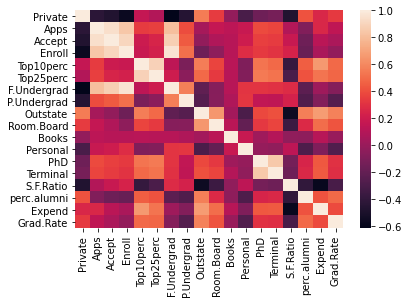

In [94]:
sns.heatmap(df.corr());

5.	We will try to predict whether a college is public or private.  Select a few predictors, create NumPy arrays X and y, and then do a training/test split.  Try hard to remember how to do this from memory.  If you can't, refer to the hints.

In [95]:
predictors = ['Apps', 'Outstate', 'F.Undergrad']
target = ['Private']
X = df[predictors].values
y= df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

6.	Train a tree classifier using Scikit-Learn's DecisionTreeClassifier.  Use the training data you created in the previous step.

In [96]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

7.	Install graphviz by entering conda install python-graphviz at the Anaconda prompt.  Then plot your tree using graphviz.  Try playing with some of the options of export_graphviz(). 

In [97]:
!pip install graphviz

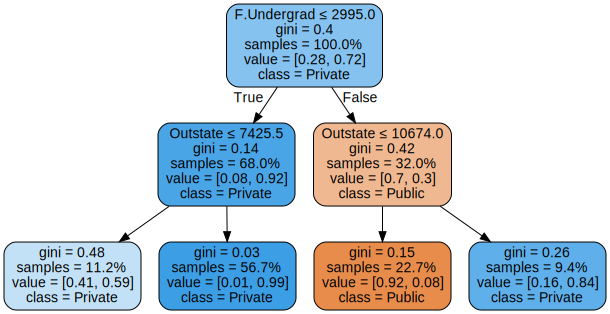

In [98]:
target_names = ['Public', 'Private']
dot_data = export_graphviz(clf, precision=2,
                                feature_names=predictors,
                                proportion=True,
                                class_names=target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

8.	Use your classification tree to predict whether examples in your test data are public or private.  Compute the confusion matrix and the accuracy of your predictions..

In [99]:
prediction = clf.predict(X_test)
(prediction == y_test).mean().round(2)

0.63

In [100]:
# convert 0 and 1 to Public and Private
y_vals = np.where(y_test[:,0] == 0, 'Public', 'Private')
pred_vals = np.where(prediction == 0, 'Public', 'Private')

pd.crosstab(y_vals, pred_vals, rownames=['Actual'], colnames=['Predicted'])

Predicted,Private,Public
Actual,,
Private,170,2
Public,14,48


9.	If you still have time, do the following:
●	try building more classification trees, using different sets of input features
●	look at, and play with, the hyperparameters available in DecisionTreeClassifier, especially max_depth.
●	see how much the classification tree that you produce depends on your particular training set
